## FDA - Project 3
By Pranav Vishwanath, Prajwal Srinivas, Praneith Ranganath

## Task 1

1. Download the dataset
(https://docs.google.com/spreadsheets/d/1GTwv07i98vL7S-J9eeP8NV1fJVnym
m1eJ31RDyt4Mxw/edit?usp=sharing)
2. Write a Python code to extract keyword data from the above file and convert it to
a weighted adjacency matrix. See the figure below to understand the process
3. Read the adjacency matrix and convert it into a weighted network
4. Compute node degree and strength
5. Show the top 10 nodes by degree and top 10 nodes by strength
6. Show the top 10 node pairs by weight
7. Plot average strength on y-axis and degree on x-axis

In [135]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import matplotlib.pyplot as plt
import nltk
from math import nan
import math

In [138]:
#reading raw csvs and storing all years data as a list (df) of individual year csvs
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/MyDrive/elon/task1')

df = []
for i in os.listdir():
    key_df = pd.read_csv(i, sep = ',', low_memory = False, encoding = "L5", error_bad_lines = False)
    df.append(key_df)

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [139]:
key_df = pd.read_csv('Keyword_data - Keyword_data.csv')
print(key_df.shape)
key_df.head()

(66, 13)


Title  \
0                                             Feb/03   
1                                                NaN   
2  Meta-Analyses of Financial Performance and Equ...   
3  Home Country Environments, Corporate Diversifi...   
4  Safeguarding Investments in Asymmetric Interor...   

                       Keyword 1                 Keyword 2  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                         EQUITY  ORGANIZATIONAL sociology   
3    DIVERSIFICATION in industry         BUSINESS planning   
4  INTERORGANIZATIONAL relations      INTERGROUP relations   

                Keyword 3               Keyword 4          Keyword 5  \
0                     NaN                     NaN                NaN   
1                     NaN                     NaN                NaN   
2             PERFORMANCE           META-analysis      PSYCHOMETRICS   
3   PERFORMANCE standards  EMPLOYEES -- Rating of  CORPORATE culture   
4  BUSINESS communication             INVESTMENTS      SUPPLY chains   

                 Keyword 6                     Keyword 7  \
0                      NaN                           NaN   
1                      NaN                           NaN   
2  ORGANIZATIONAL research         FINANCIAL performance   
3       STRATEGIC planning  ORGANIZATIONAL effectiveness   
4     KNOWLEDGE management  INTERORGANIZATIONAL networks   

              Keyword 8                     Keyword 9  \
0                   NaN                           NaN   
1                   NaN                           NaN   
2         AGENCY theory  ORGANIZATIONAL effectiveness   
3    MANAGEMENT science           MANAGEMENT research   
4  CORPORATE governance         GROUP decision making   

                Keyword 10            Keyword 11 Keyword 12  
0                      NaN                   NaN        NaN  
1                      NaN                   NaN        NaN  
2  ORGANIZATIONAL behavior  CORPORATE governance        NaN  
3       PRODUCT management                   NaN        NaN  
4     INTELLECTUAL capital                   NaN        NaN

In [140]:
#selecting all columns other than the first column and then dropping the rows where all the values are nan (rows where after year information)
keywords = key_df.iloc[:, 1:]
key_df.dropna( how = 'all', inplace = True)
print(key_df.shape)
key_df.head()

(55, 13)


Title  \
0                                             Feb/03   
2  Meta-Analyses of Financial Performance and Equ...   
3  Home Country Environments, Corporate Diversifi...   
4  Safeguarding Investments in Asymmetric Interor...   
5  Managerialist and Human Capital Explanations f...   

                       Keyword 1                 Keyword 2  \
0                            NaN                       NaN   
2                         EQUITY  ORGANIZATIONAL sociology   
3    DIVERSIFICATION in industry         BUSINESS planning   
4  INTERORGANIZATIONAL relations      INTERGROUP relations   
5         EXECUTIVE compensation                     WAGES   

                Keyword 3               Keyword 4             Keyword 5  \
0                     NaN                     NaN                   NaN   
2             PERFORMANCE           META-analysis         PSYCHOMETRICS   
3   PERFORMANCE standards  EMPLOYEES -- Rating of     CORPORATE culture   
4  BUSINESS communication             INVESTMENTS         SUPPLY chains   
5           HUMAN capital         LABOR economics  PERSONNEL management   

                 Keyword 6                        Keyword 7  \
0                      NaN                              NaN   
2  ORGANIZATIONAL research            FINANCIAL performance   
3       STRATEGIC planning     ORGANIZATIONAL effectiveness   
4     KNOWLEDGE management     INTERORGANIZATIONAL networks   
5       MANAGEMENT science  CONTINGENCY theory (Management)   

                 Keyword 8                       Keyword 9  \
0                      NaN                             NaN   
2            AGENCY theory    ORGANIZATIONAL effectiveness   
3       MANAGEMENT science             MANAGEMENT research   
4     CORPORATE governance           GROUP decision making   
5  COMPENSATION management  EXECUTIVE ability (Management)   

                Keyword 10            Keyword 11 Keyword 12  
0                      NaN                   NaN        NaN  
2  ORGANIZATIONAL behavior  CORPORATE governance        NaN  
3       PRODUCT management                   NaN        NaN  
4     INTELLECTUAL capital                   NaN        NaN  
5     CORPORATE governance                   NaN        NaN

In [141]:
#looping thorugh to find the individual unique keywords
un = [i for i in list(set(list(set(np.concatenate(key_df.iloc[:, 1:].values).flat)))) if i != 'nan']

In [142]:
mt = np.zeros((len(un), len(un)), dtype = int)
temp_dict = key_df.set_index('Title').T.to_dict('list')

In [143]:
#creating the adjacency matrix
for i in range(len(un)):
  for j in range(len(un)):
    if i != j :
      if (mt[i][j] == 0) and (mt[j][i] == 0) :
        for k in temp_dict.keys():
          if (un[i] in (temp_dict[k])) and (un[j] in (temp_dict[k])):
            mt[i][j] = mt[i][j] + 1
            mt[j][i] = mt[j][i] + 1

In [144]:
#building the network usnig the created numpy matrix
nw = nx.from_numpy_matrix(mt, parallel_edges=False)

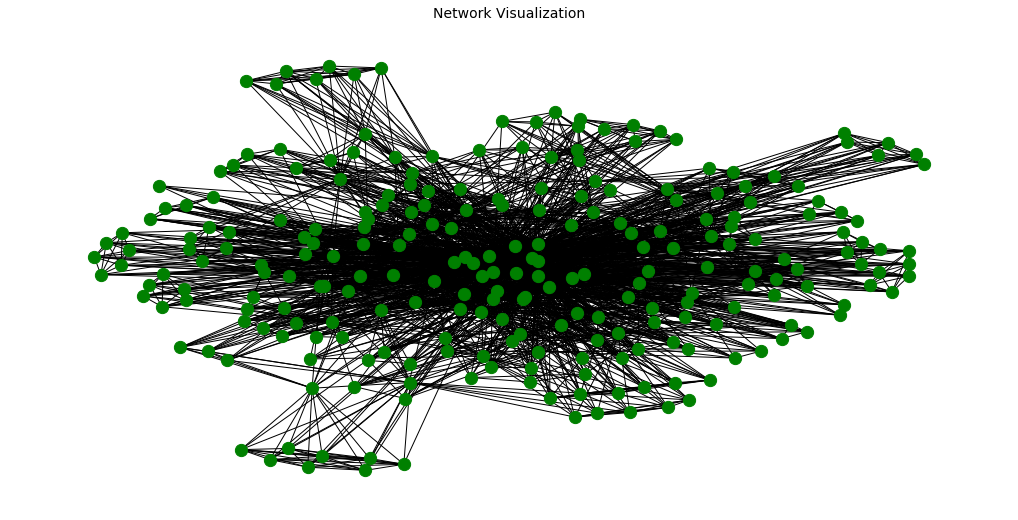

In [145]:
#visualising the network
plt.figure(figsize = (18, 9))
plt.title("Network Visualization", size = 14)
nx.draw(nw, node_size = 150, node_color = 'green')
plt.show()

In [146]:
def results(net):
  print("Nodes:", net.number_of_nodes() )
  print("Edges:", net.number_of_edges() )
  print("Network Info: ", net)
  print('Degree: ', net.degree())
  print("weighted Degree: ", net.degree(weight = 'weight'))

def add_degree(data):
  df_d = pd.DataFrame(data, columns = ['Nodes', 'Degree'])
  df_d['Keywords'] = un
  return df_d

def add_strength(data):
  df_s = pd.DataFrame(data, columns = ['Nodes', 'Strength'])
  df_s['Keywords'] = un
  return df_s

def addweights(df_s, mat):
  lis = []
  for i in range(len(un)):
    for j in range(len(un)):
      lis.append([df_s['Keywords'][i], df_s['Keywords'][j], mat[i][j]])
  df_w = pd.DataFrame(lis, columns = ['key1', 'key2', 'weight'], dtype = float) 
  return df_w

def plot(df_d,df_s):
  final_df = pd.merge(df_d, df_s,how = "inner", on = ['Nodes'])
  final_df = final_df[['Degree', 'Strength']].groupby('Degree').mean().reset_index()
  plt.plot(final_df['Degree'], final_df['Strength'])
  plt.xlabel('Degree')
  plt.ylabel('Strength')
  plt.title('Degree vs Strength')

In [147]:
results(nw)

Nodes: 249
Edges: 2341
Network Info:  Graph with 249 nodes and 2341 edges
Degree:  [(0, 200), (1, 10), (2, 10), (3, 10), (4, 36), (5, 11), (6, 10), (7, 11), (8, 19), (9, 21), (10, 10), (11, 20), (12, 11), (13, 11), (14, 50), (15, 103), (16, 10), (17, 10), (18, 10), (19, 11), (20, 10), (21, 11), (22, 20), (23, 25), (24, 10), (25, 10), (26, 10), (27, 11), (28, 22), (29, 94), (30, 18), (31, 10), (32, 11), (33, 10), (34, 18), (35, 11), (36, 10), (37, 11), (38, 27), (39, 10), (40, 10), (41, 24), (42, 21), (43, 8), (44, 10), (45, 10), (46, 15), (47, 11), (48, 18), (49, 10), (50, 10), (51, 10), (52, 11), (53, 20), (54, 10), (55, 10), (56, 10), (57, 29), (58, 10), (59, 11), (60, 11), (61, 11), (62, 10), (63, 11), (64, 11), (65, 11), (66, 10), (67, 11), (68, 10), (69, 28), (70, 11), (71, 20), (72, 20), (73, 11), (74, 9), (75, 10), (76, 11), (77, 21), (78, 21), (79, 9), (80, 10), (81, 10), (82, 10), (83, 27), (84, 10), (85, 11), (86, 11), (87, 32), (88, 27), (89, 11), (90, 11), (91, 19), (92, 11

In [148]:
df_s = add_strength(nw.degree(weight = 'weight'))
df_s.sort_values(by = ['Strength'], ascending= False).head(10)

Nodes  Strength                      Keywords
0        0       378                           NaN
197    197       284       ORGANIZATIONAL behavior
217    217       155  ORGANIZATIONAL effectiveness
15      15       147            MANAGEMENT science
29      29       134          PERSONNEL management
186    186       121               DECISION making
150    150       118      ORGANIZATIONAL structure
237    237       103      ORGANIZATIONAL sociology
234    234        93          CORPORATE governance
182    182        89         INDUSTRIAL management

In [149]:
df_d =  add_degree(nw.degree)
df_d.sort_values(by = ['Degree'], ascending= False).head(10)

Nodes  Degree                      Keywords
0        0     200                           NaN
197    197     167       ORGANIZATIONAL behavior
217    217     105  ORGANIZATIONAL effectiveness
15      15     103            MANAGEMENT science
29      29      94          PERSONNEL management
186    186      91               DECISION making
150    150      75      ORGANIZATIONAL structure
148    148      67            STRATEGIC planning
237    237      67      ORGANIZATIONAL sociology
182    182      65         INDUSTRIAL management

In [150]:
df_w = addweights(df_s, mt)
df_w.sort_values(by = ['weight'], ascending= False).head(10)

<ipython-input-150-d49fae9c3778>:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  df_w = addweights(df_s, mt)


key1                          key2  weight
49053       ORGANIZATIONAL behavior                           NaN    19.0
197                             NaN       ORGANIZATIONAL behavior    19.0
54033  ORGANIZATIONAL effectiveness                           NaN    11.0
15                              NaN            MANAGEMENT science    11.0
217                             NaN  ORGANIZATIONAL effectiveness    11.0
150                             NaN      ORGANIZATIONAL structure    11.0
54230  ORGANIZATIONAL effectiveness       ORGANIZATIONAL behavior    11.0
37350      ORGANIZATIONAL structure                           NaN    11.0
49270       ORGANIZATIONAL behavior  ORGANIZATIONAL effectiveness    11.0
3735             MANAGEMENT science                           NaN    11.0

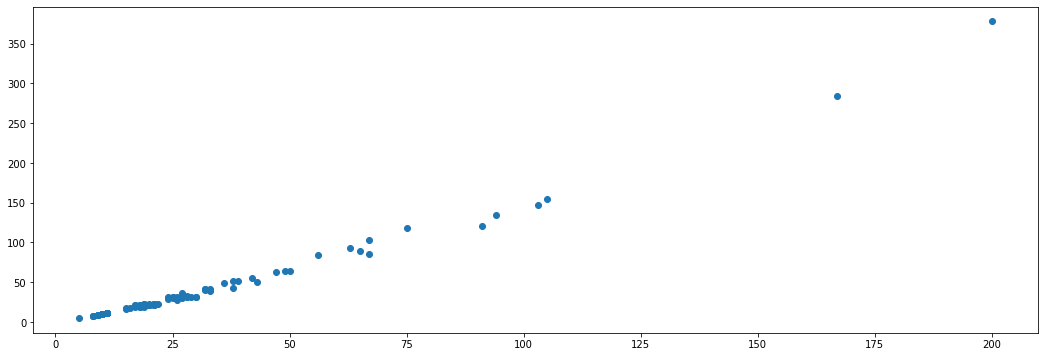

In [151]:
plt.figure(figsize = (18, 6))
plt.scatter(df_d['Degree'], df_s['Strength'])

## Task 2

The [link](https://https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021) provides the twitter data of Elon Musk from 2010 - 2022. For analysis consider
the years 2017-2022. Each year has thousands of tweets. Assume each year to be a
document (all the tweets in one year will be considered as a document).

1. Compute word frequencies for each year. Exclude the stop words
2. Show top 10 words (for each year) by the highest value of word frequency
3. Plot histogram of word frequencies for each year
4. Use Zipf’s law and plot log-log plots of word frequencies and rank for each year
5. Create bigram network graphs for each year



Compute word frequencies for each year. Exclude the stop words

In [152]:
#importing the required libraries and installing all the dependencies
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import scipy as sp
import os
import networkx as nx
!pip install --user scipy==1.8.1
!pip install 'networkx<2.7'

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
#reading raw csvs and storing all years data as a list (df) of individual year csvs
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/MyDrive/elon/task2')

df = []
for i in os.listdir():
    temp_df = pd.read_csv(i, sep = ',', low_memory = False, encoding = "L5", error_bad_lines = False)
    df.append(temp_df)

#now we create a tweer_df dataframe where only th etweets and the associated year is present and then filtering out the 2017-2022 data
tweet_df = pd.DataFrame(columns = ['tweet', 'date'])
for i, j in enumerate(df):
    tweet_df = pd.concat([tweet_df, df[i].loc[:, ['tweet', 'date']]], ignore_index = True, axis = 0)
tweet_df['date'] = pd.to_datetime(tweet_df['date'])
tweet_df['year'] = pd.DatetimeIndex(tweet_df['date']).year
tweet_df = tweet_df.drop(columns = ['date'])
tweet_df = tweet_df[(tweet_df.year >= 2017) & (tweet_df.year <= 2022)]
tweet_df = tweet_df.sort_values(by = 'year').reset_index(drop = True)
tweet_df

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


tweet  year
0      @Dem0ney Yeah. That's been on the future featu...  2017
1      Robots that learn by example from @OpenAI  htt...  2017
2      @gmem_ It's sort of like a pickaxe if you use ...  2017
3      @BarakaMahili Gary the snail is like Speedy Go...  2017
4             And ... it's done  https://t.co/MBBSa04Eoc  2017
...                                                  ...   ...
23601                                     @BillyM2k Nice  2022
23602  @GailAlfarATX I have trouble understanding any...  2022
23603  Been driving latest Cybertruck prototype aroun...  2022
23604                                     @heydave7 ğ¤£  2022
23605     ğ¶Always look on the bright side of lifeğ¶  2022

[23606 rows x 2 columns]

In [154]:
#defining a function to clean the words of punctuations, stopwords and to perform lemmatization (grouping words of simillar meaning into the same)
def wordcleaner(tok):
    stop_words = list(set(['@','$','.',',','!',"'s",'i','I','&','%','*','"','#','(',')','[',']','{','}','/','?','<','>','`','~','-','_','+','=',' & ',' &','& ','the','3','it','its',"it's",'this', 'http', 'https', 'amp'] + list(stopwords.words('english'))))
    return [WordNetLemmatizer().lemmatize(w) for w in [w.lower() for w in tok if (w.lower() not in stop_words) & (w.lower().isalpha())]]

In [155]:
#now creating a word frequency dataframe (final_tweet_df) usign the wordcleaner function
final_tweet_df = pd.DataFrame(columns = ['word', 'freq', 'year'])
for i in list(tweet_df.year.unique()):
    count = Counter(wordcleaner(word_tokenize(" ".join(tweet_df[tweet_df.year == i]['tweet']))))
    temp_df = pd.DataFrame(count.items(), columns = ['word', 'freq']).sort_values(by = 'freq', ascending = False)
    temp_df.loc[:, ['year']] = i
    final_tweet_df = pd.concat([final_tweet_df, temp_df.loc[:, ['word', 'freq', 'year']]], ignore_index = True, axis = 0)
final_tweet_df.loc[:, 'year'] = pd.to_numeric(final_tweet_df['year'])
final_tweet_df.loc[:, 'freq'] = pd.to_numeric(final_tweet_df['freq'])

In [156]:
final_tweet_df.sort_values(by = ['year', 'freq'], ascending = [True, False])

word  freq  year
0           tesla   240  2017
1             car   192  2017
2           model   177  2017
3             yes   162  2017
4            good   159  2017
...           ...   ...   ...
26394  commercial     2  2022
26395    airliner     2  2022
26396         air     2  2022
26397       album     2  2022
26398     willing     2  2022

[26399 rows x 3 columns]

Show top 10 words (for each year) by the highest value of word frequency

In [157]:
final_tweet_df.groupby(['year'])['word', 'freq'].apply(lambda x: x.nlargest(10, columns = ['freq']))

<ipython-input-157-1f257ea711ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_tweet_df.groupby(['year'])['word', 'freq'].apply(lambda x: x.nlargest(10, columns = ['freq']))


word  freq
year                            
2017 0               tesla   240
     1                 car   192
     2               model   177
     3                 yes   162
     4                good   159
     5              spacex   156
     6                like   150
     7                 one   144
     8               first   126
     9                next   123
2018 3299            tesla  1351
     3300              car   516
     3301              yes   324
     3302             good   302
     3303            model   300
     3304             like   285
     3305           spacex   264
     3306             year   253
     3307             make   231
     3308            would   228
2019 8873            tesla  1130
     8874   erdayastronaut   520
     8875           spacex   427
     8876          flcnhvy   364
     8877              yes   307
     8878              car   264
     8879             year   205
     8880            would   194
     8881            great   193
     8882             time   185
2020 14024           tesla   354
     14025  erdayastronaut   247
     14026         flcnhvy   239
     14027        ppathole   225
     14028          spacex   206
     14029             yes   160
     14030           great   127
     14031   thirdrowtesla   123
     14032            much   120
     14033   teslaownerssv   116
2021 19686           tesla   322
     19687          spacex   234
     19688   wholemarsblog   189
     19689   teslaownerssv   119
     19690        ppathole   116
     19691  erdayastronaut   111
     19692            time   106
     19693            year   104
     19694            good   103
     19695           great   102
2022 24844           tesla   106
     24845   wholemarsblog    84
     24846          spacex    56
     24847   teslaownerssv    50
     24848             car    42
     24849   sawyermerritt    36
     24850          people    34
     24851             yes    32
     24852           would    30
     24853        starlink    28

Plot histogram of word frequencies for each year 

In [158]:
#taking the top 20 tweets by count for each year
top20_tweets_df = final_tweet_df.groupby(['year'])['word', 'freq'].apply(lambda x: x.nlargest(20, columns = ['freq'])).reset_index().drop(columns = 'level_1')

<ipython-input-158-2355a1660b0d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top20_tweets_df = final_tweet_df.groupby(['year'])['word', 'freq'].apply(lambda x: x.nlargest(20, columns = ['freq'])).reset_index().drop(columns = 'level_1')


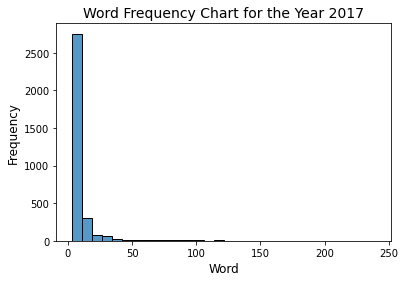

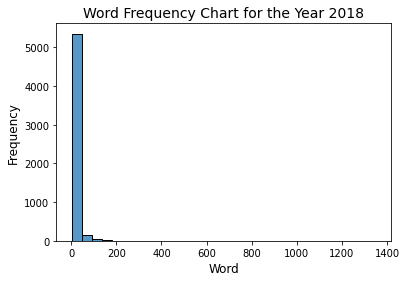

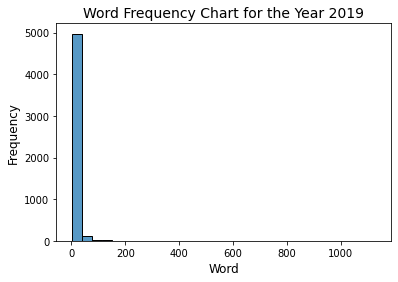

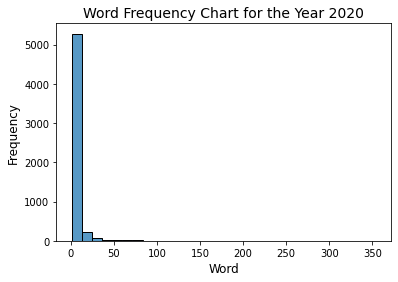

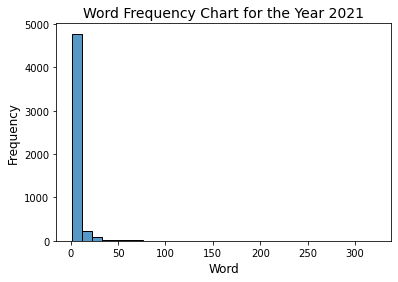

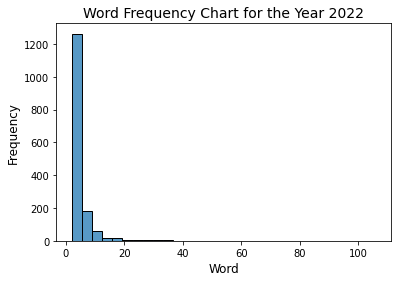

In [159]:
#plotting function to print the histogram of the word frequencies for each year 
for i in sorted(list(top20_tweets_df.year.unique())):
    sns.histplot(data = final_tweet_df[final_tweet_df.year == i], x = 'freq', bins = 30)
    plt.xlabel('Word', size = 12)
    plt.ylabel('Frequency', size = 12)
    plt.title(f'Word Frequency Chart for the Year {i}', size = 14)
    plt.show()


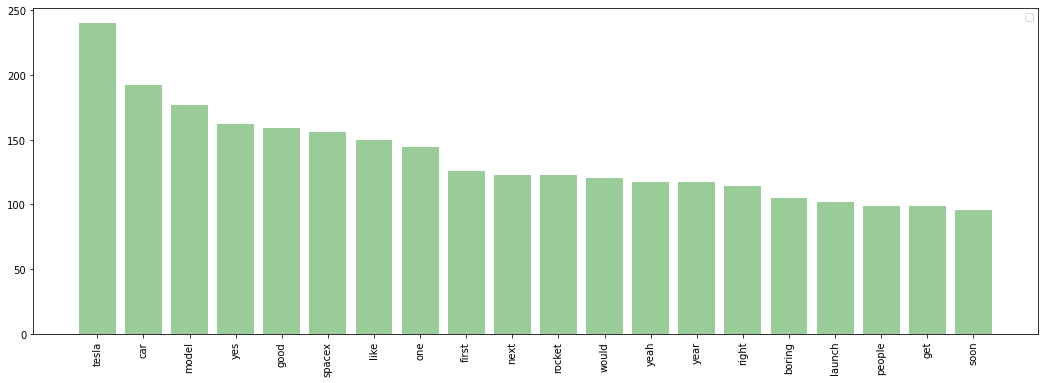

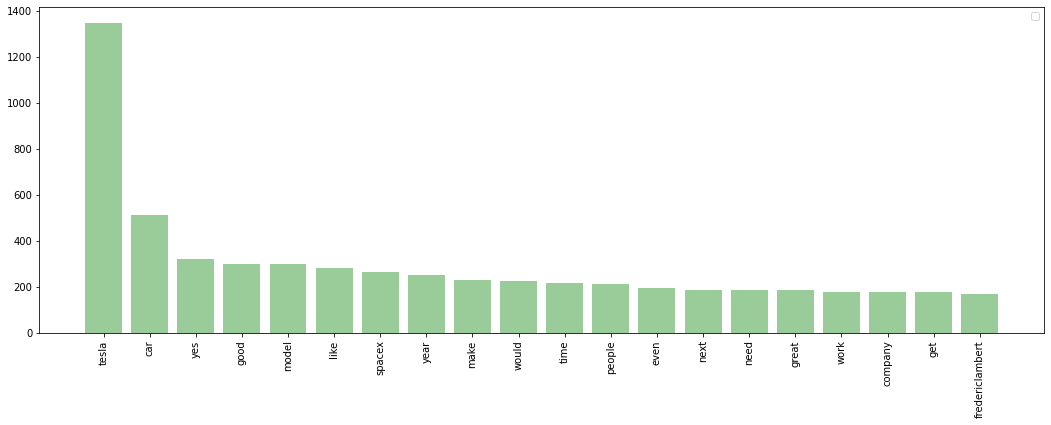

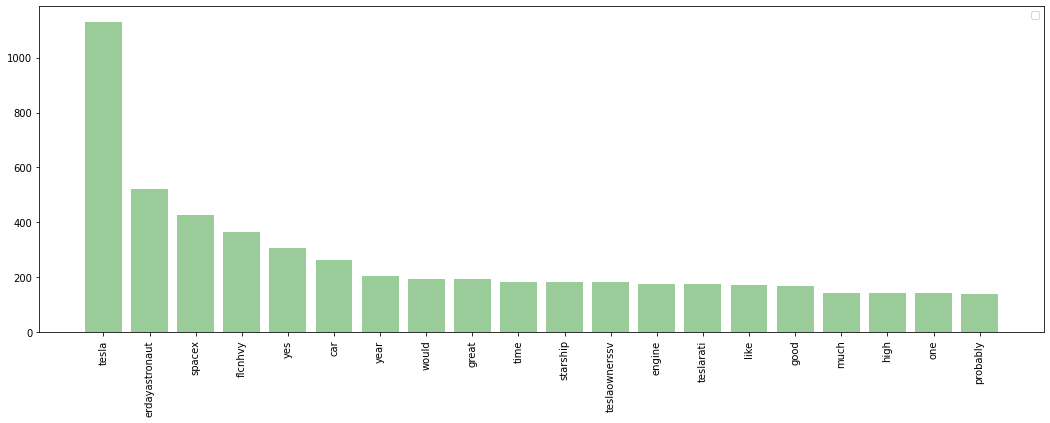

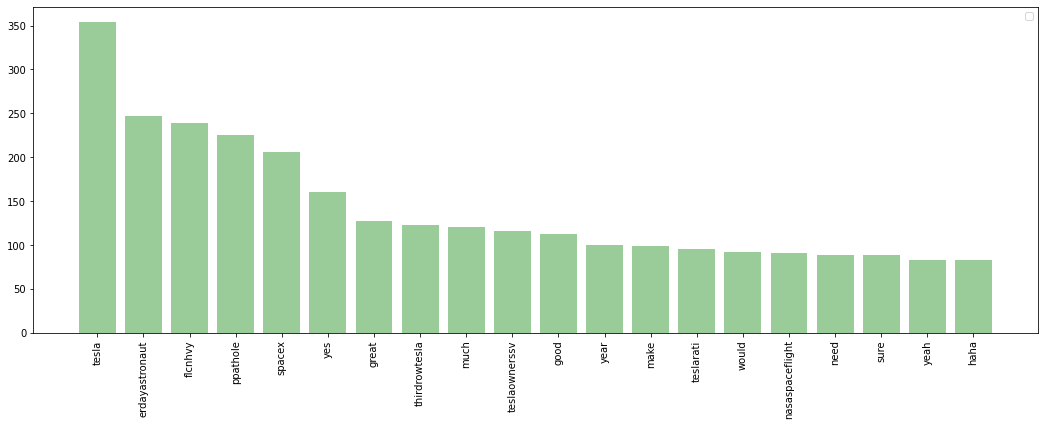

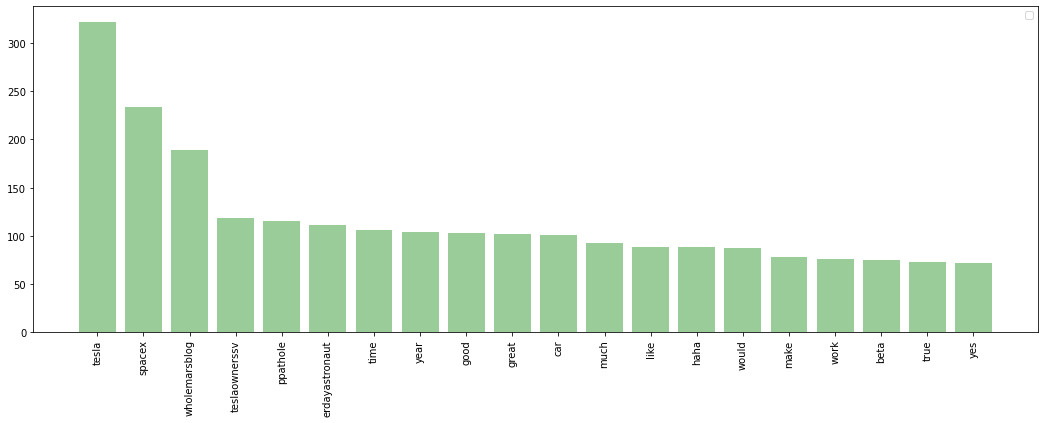

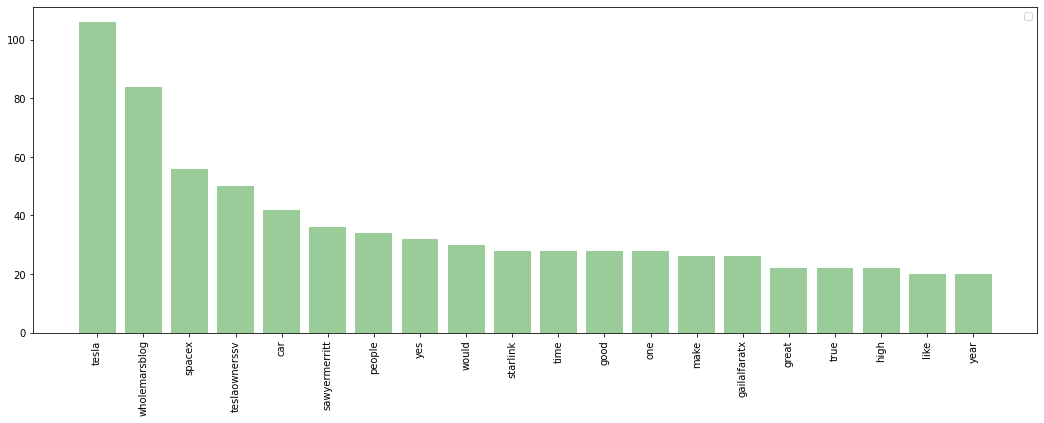

In [160]:
#plotting the bar plot for the top 20 words for each year
for i in sorted(list(top20_tweets_df.year.unique())):

    plt.figure(figsize = (18, 6))
    freq_bar = plt.bar(top20_tweets_df[top20_tweets_df.year == i].loc[:, 'word'], top20_tweets_df[top20_tweets_df.year == i].loc[:, 'freq'], color = 'green', alpha = 0.4)


    plt.xticks(rotation = 90)
    plt.legend()

    plt.show()

Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

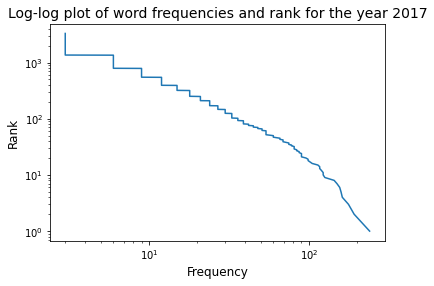

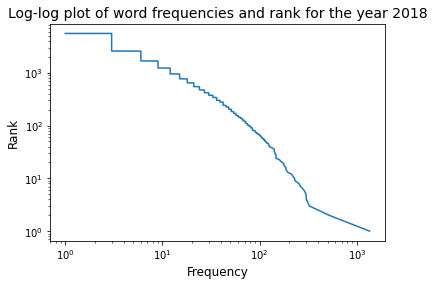

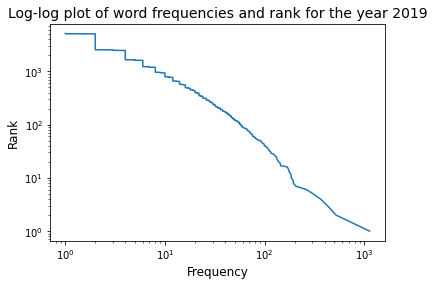

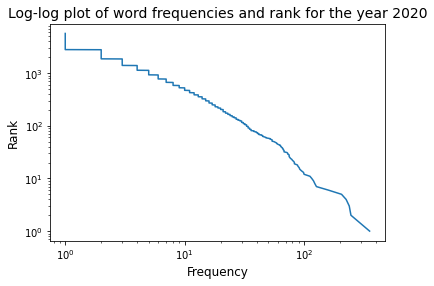

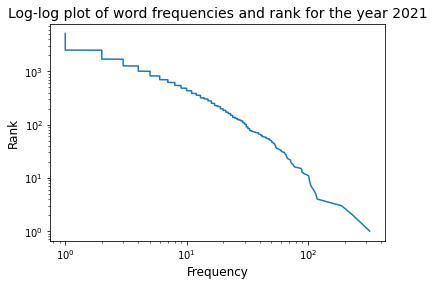

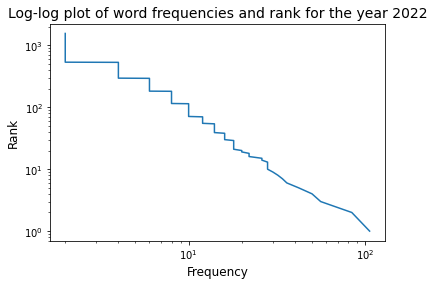

In [161]:
#function to draw the log log plots of word frequencies for each year
for i in sorted(list(final_tweet_df.year.unique())):
    plt.loglog(final_tweet_df[final_tweet_df.year == i].loc[:, 'freq'], range(1,len(final_tweet_df[final_tweet_df.year == i].loc[:, 'freq']) + 1))
    plt.title(f"Log-Log plot for the year {i}")
    plt.xlabel('frequency')
    plt.ylabel('rank')
    plt.title(f'Log-log plot of word frequencies and rank for the year {i}', size = 14)
    plt.xlabel('Frequency', size = 12)
    plt.ylabel('Rank', size = 12)
    plt.show()

Create bigram network graphs for each year

In [162]:
#now creating a word frequency dataframe (final_tweet_df) usign the wordcleaner function
tweet_df['tweet_new'] = tweet_df['tweet'].apply(lambda x: ' '.join(wordcleaner(word_tokenize(x))))
bigram_df_temp = tweet_df.drop(columns = 'tweet')

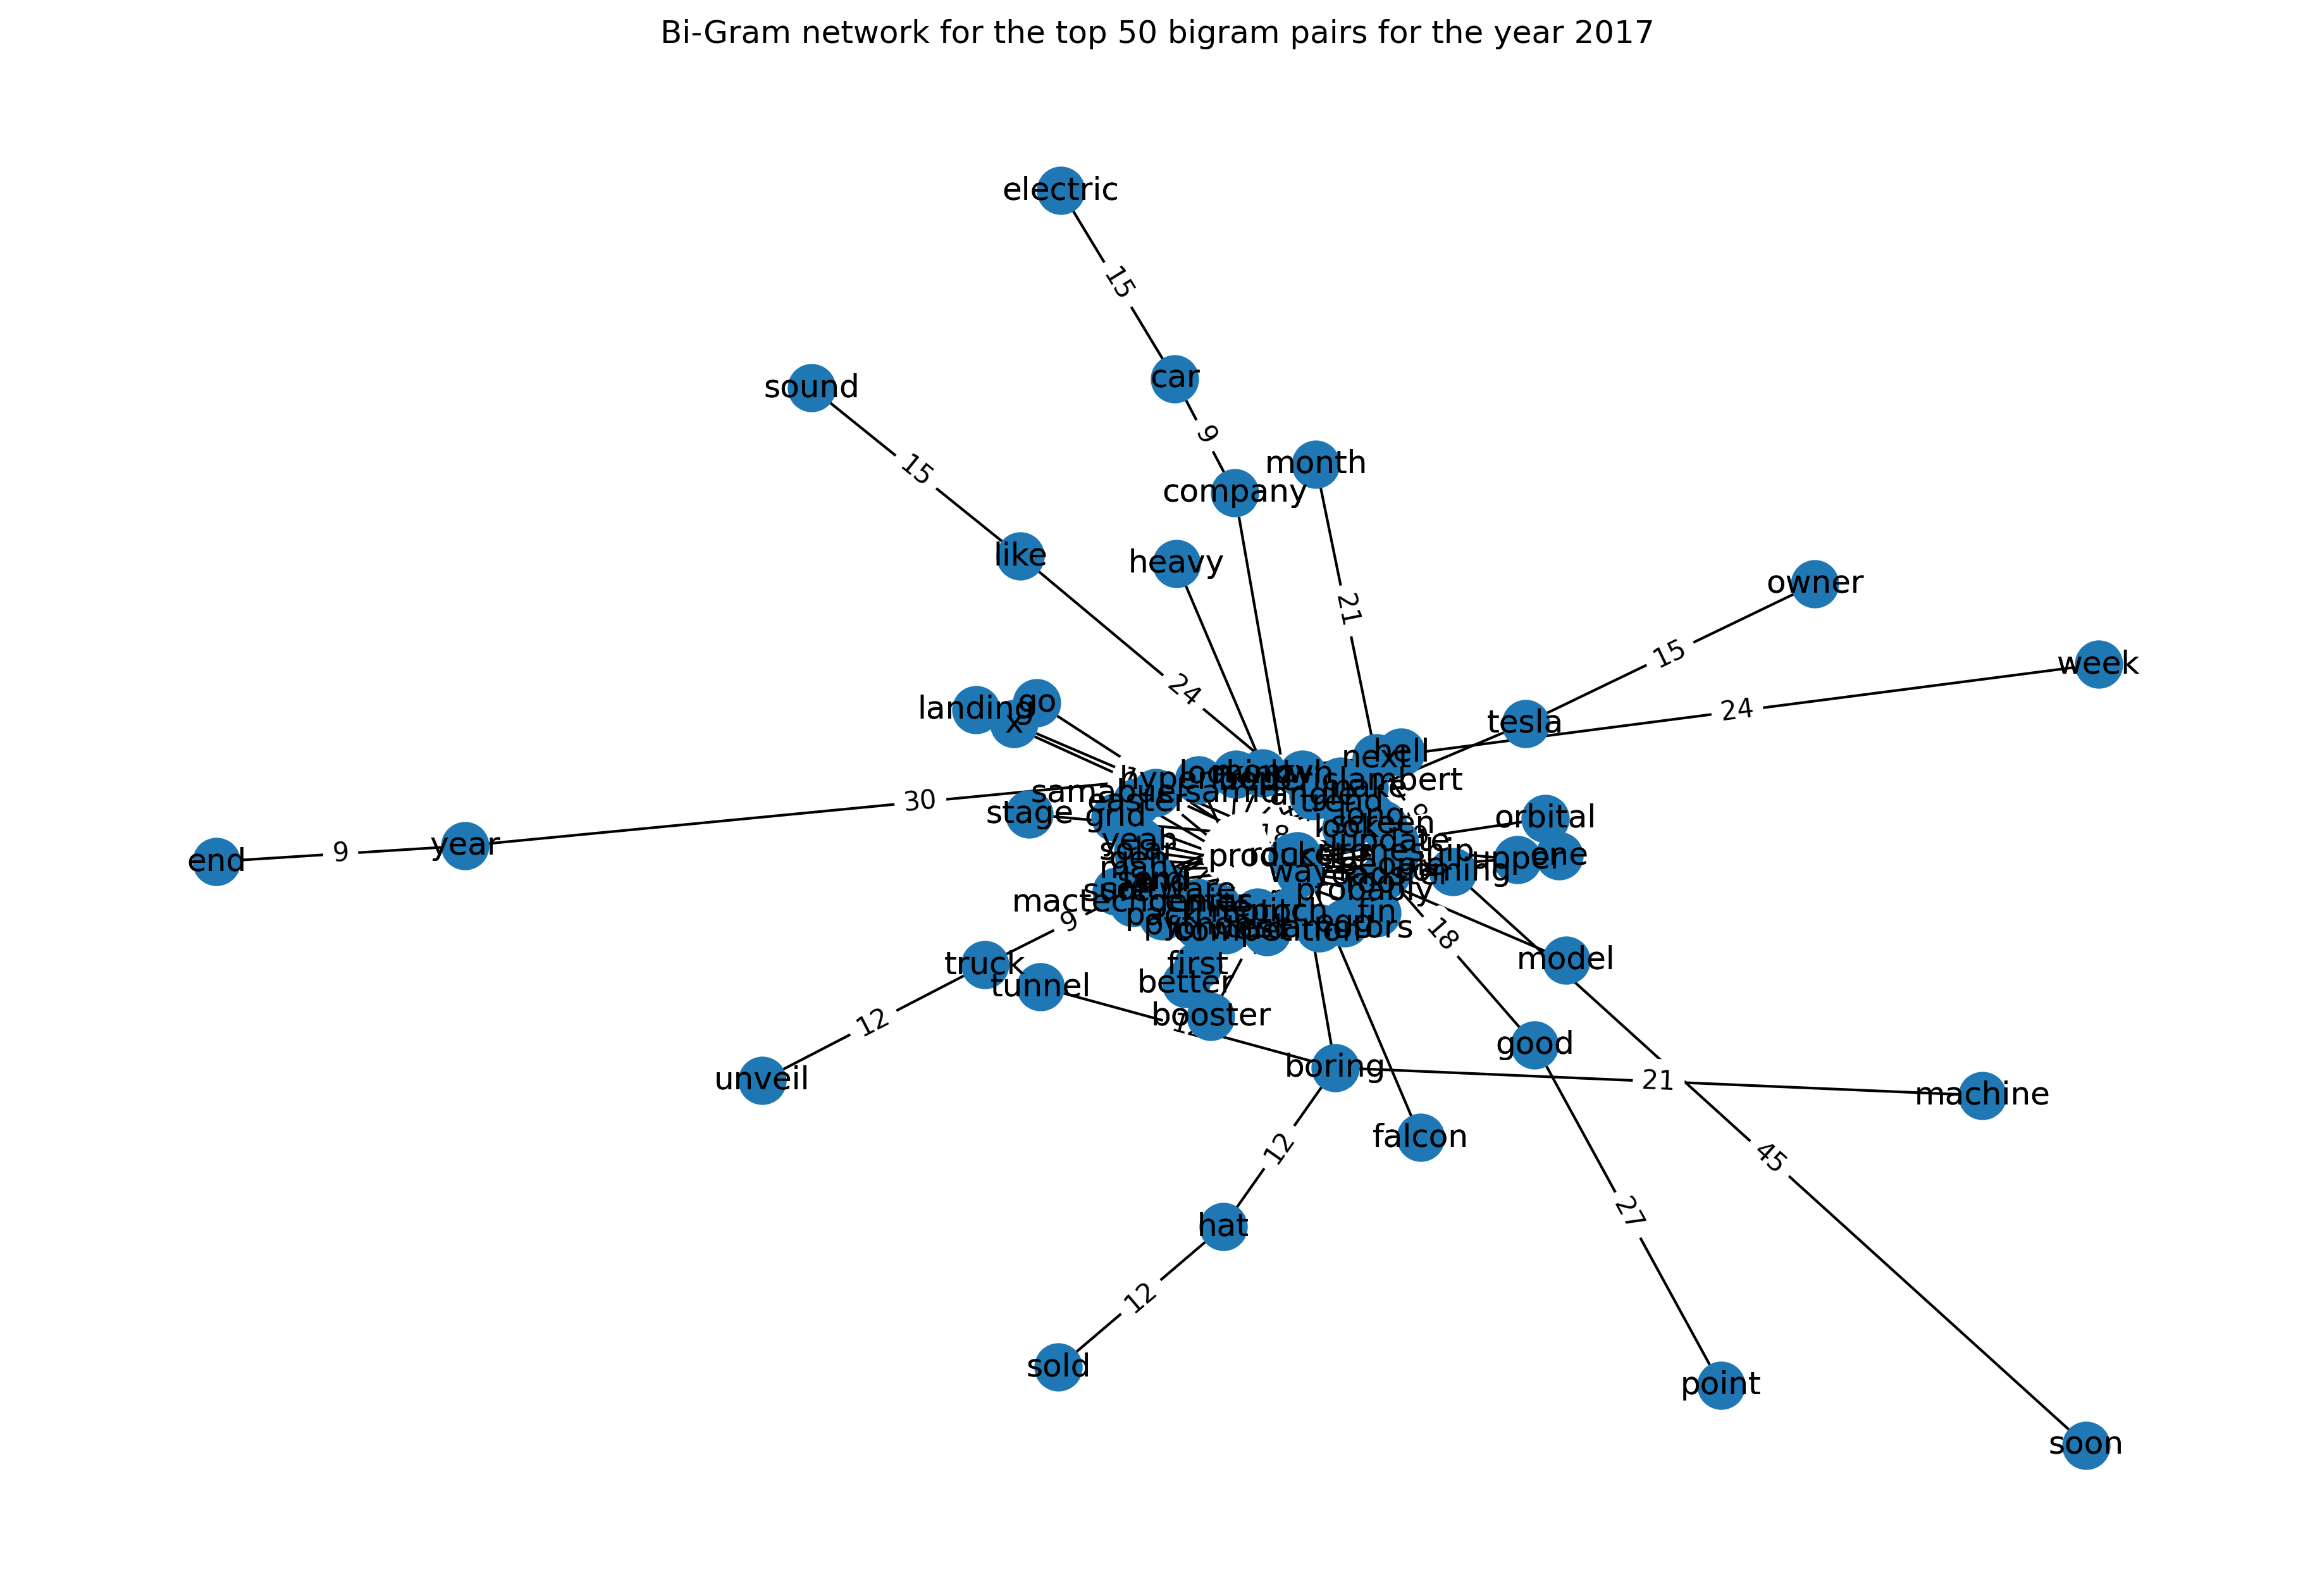

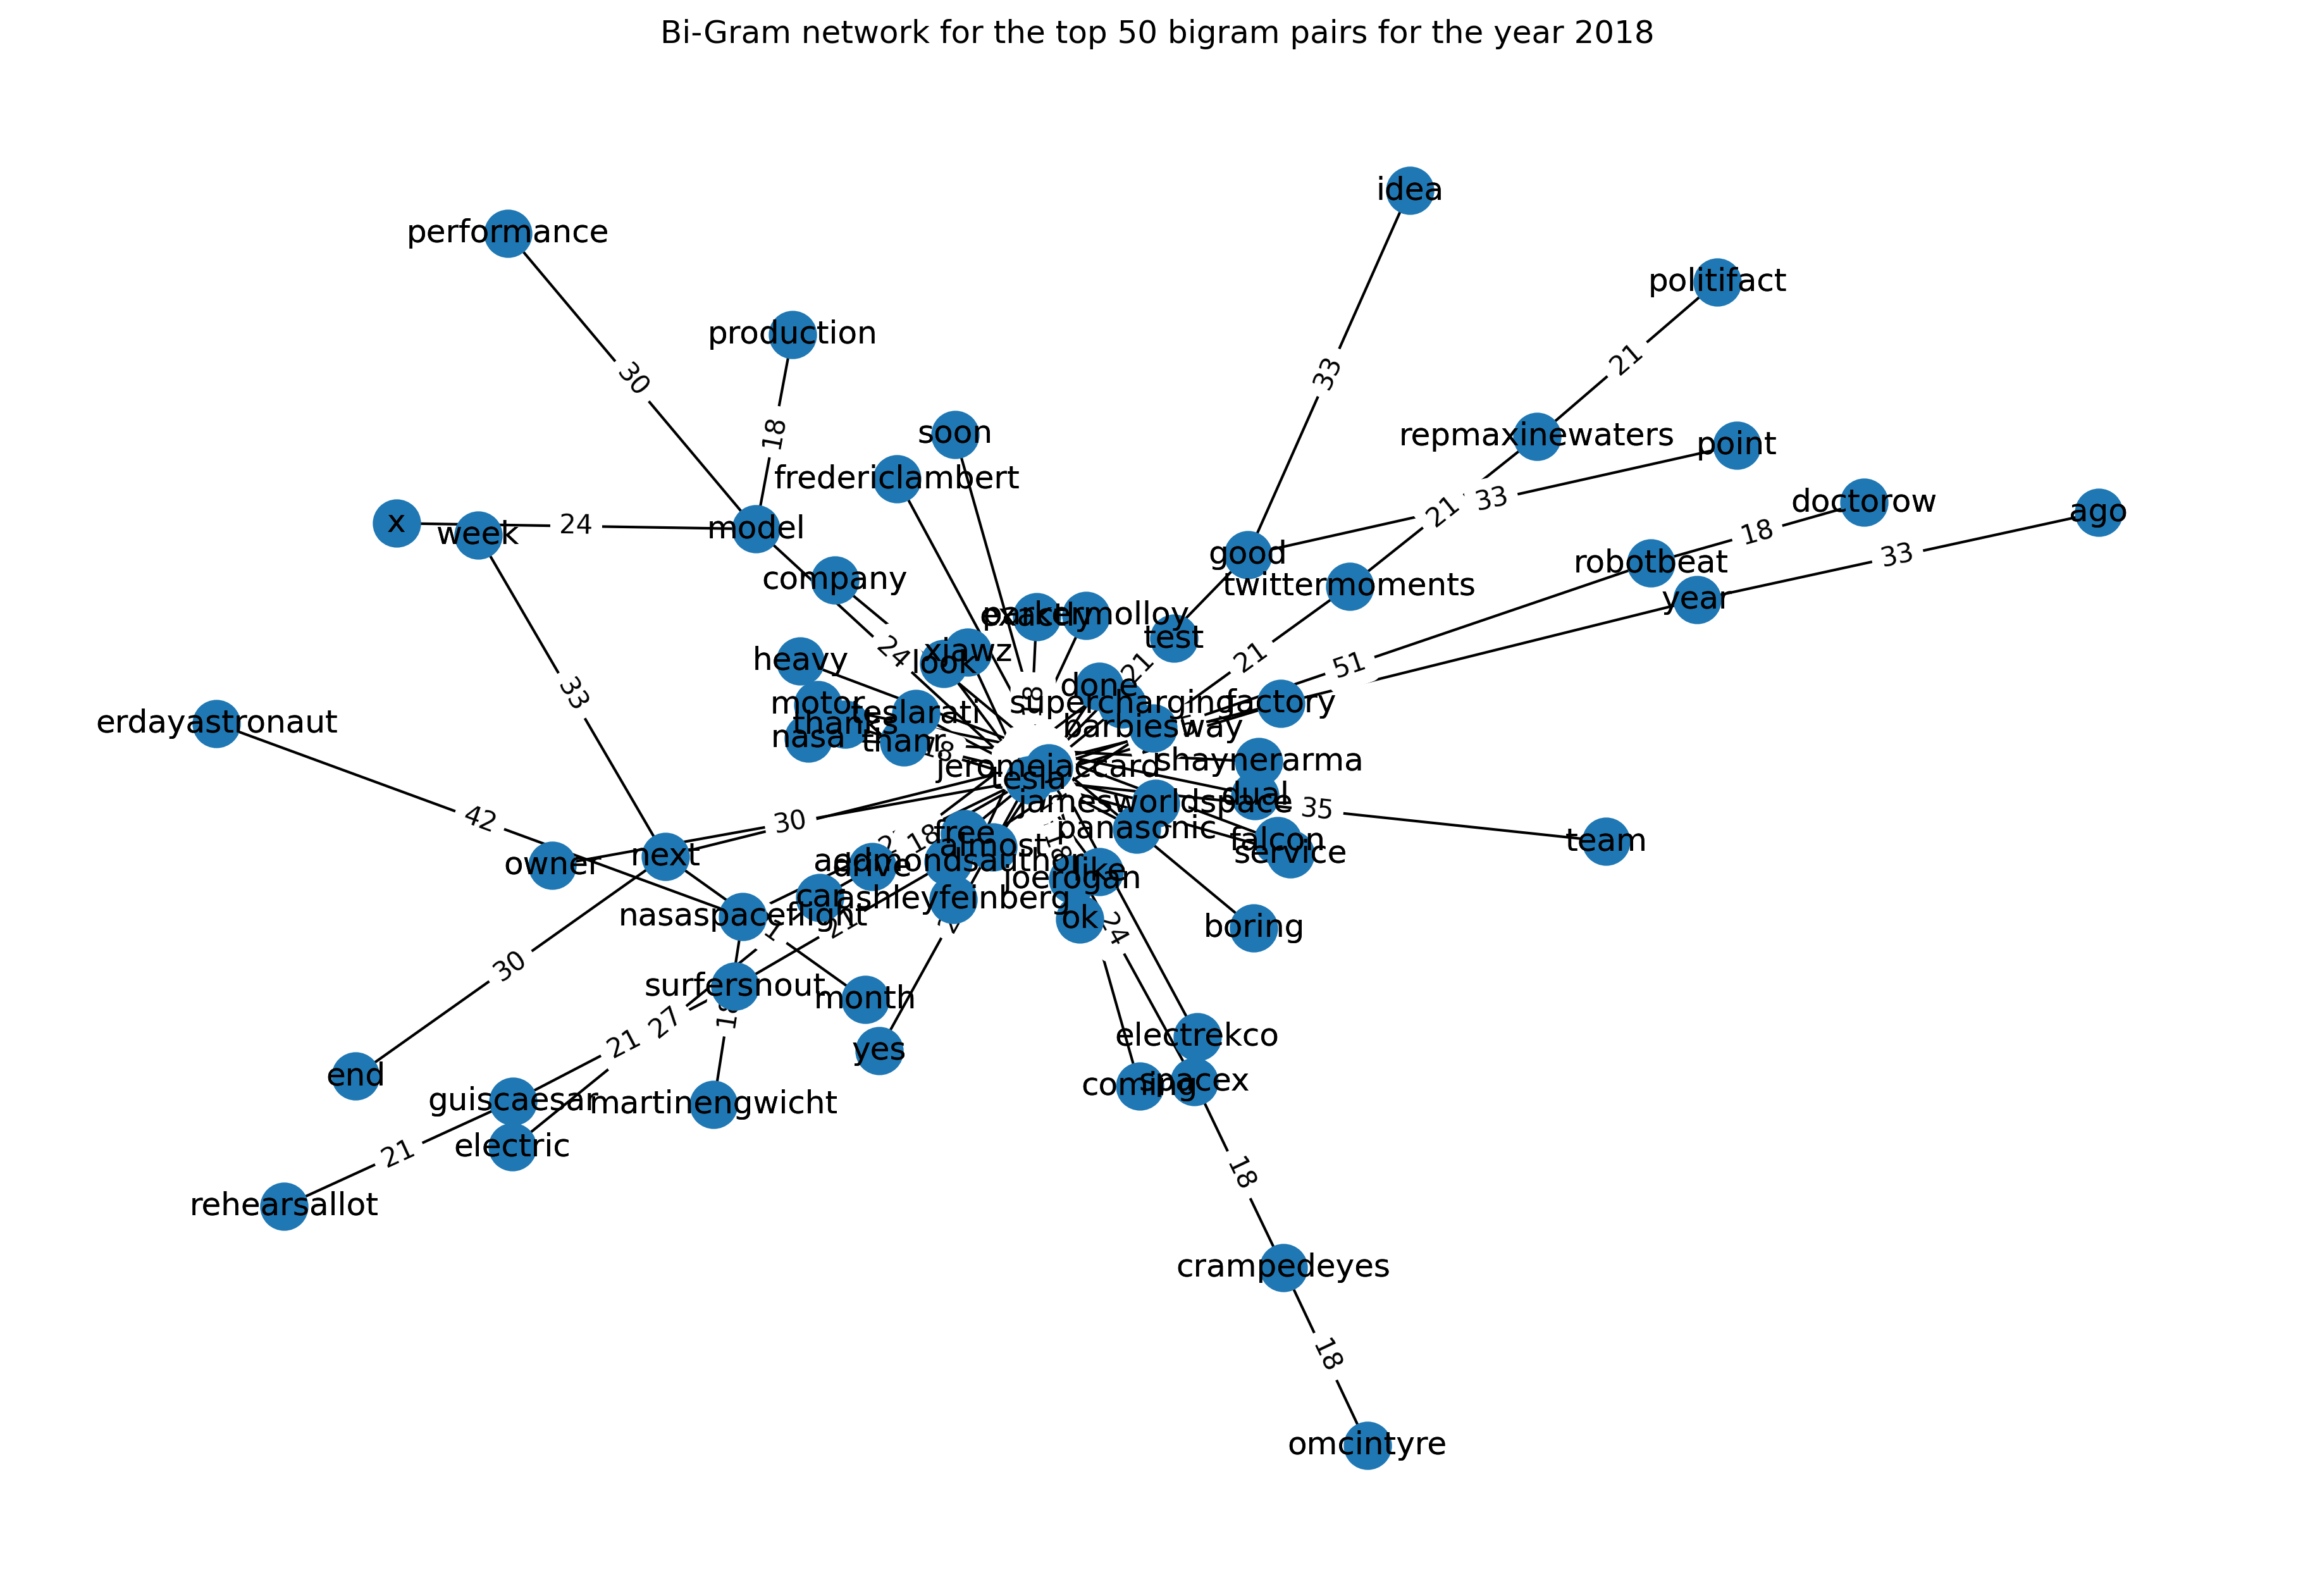

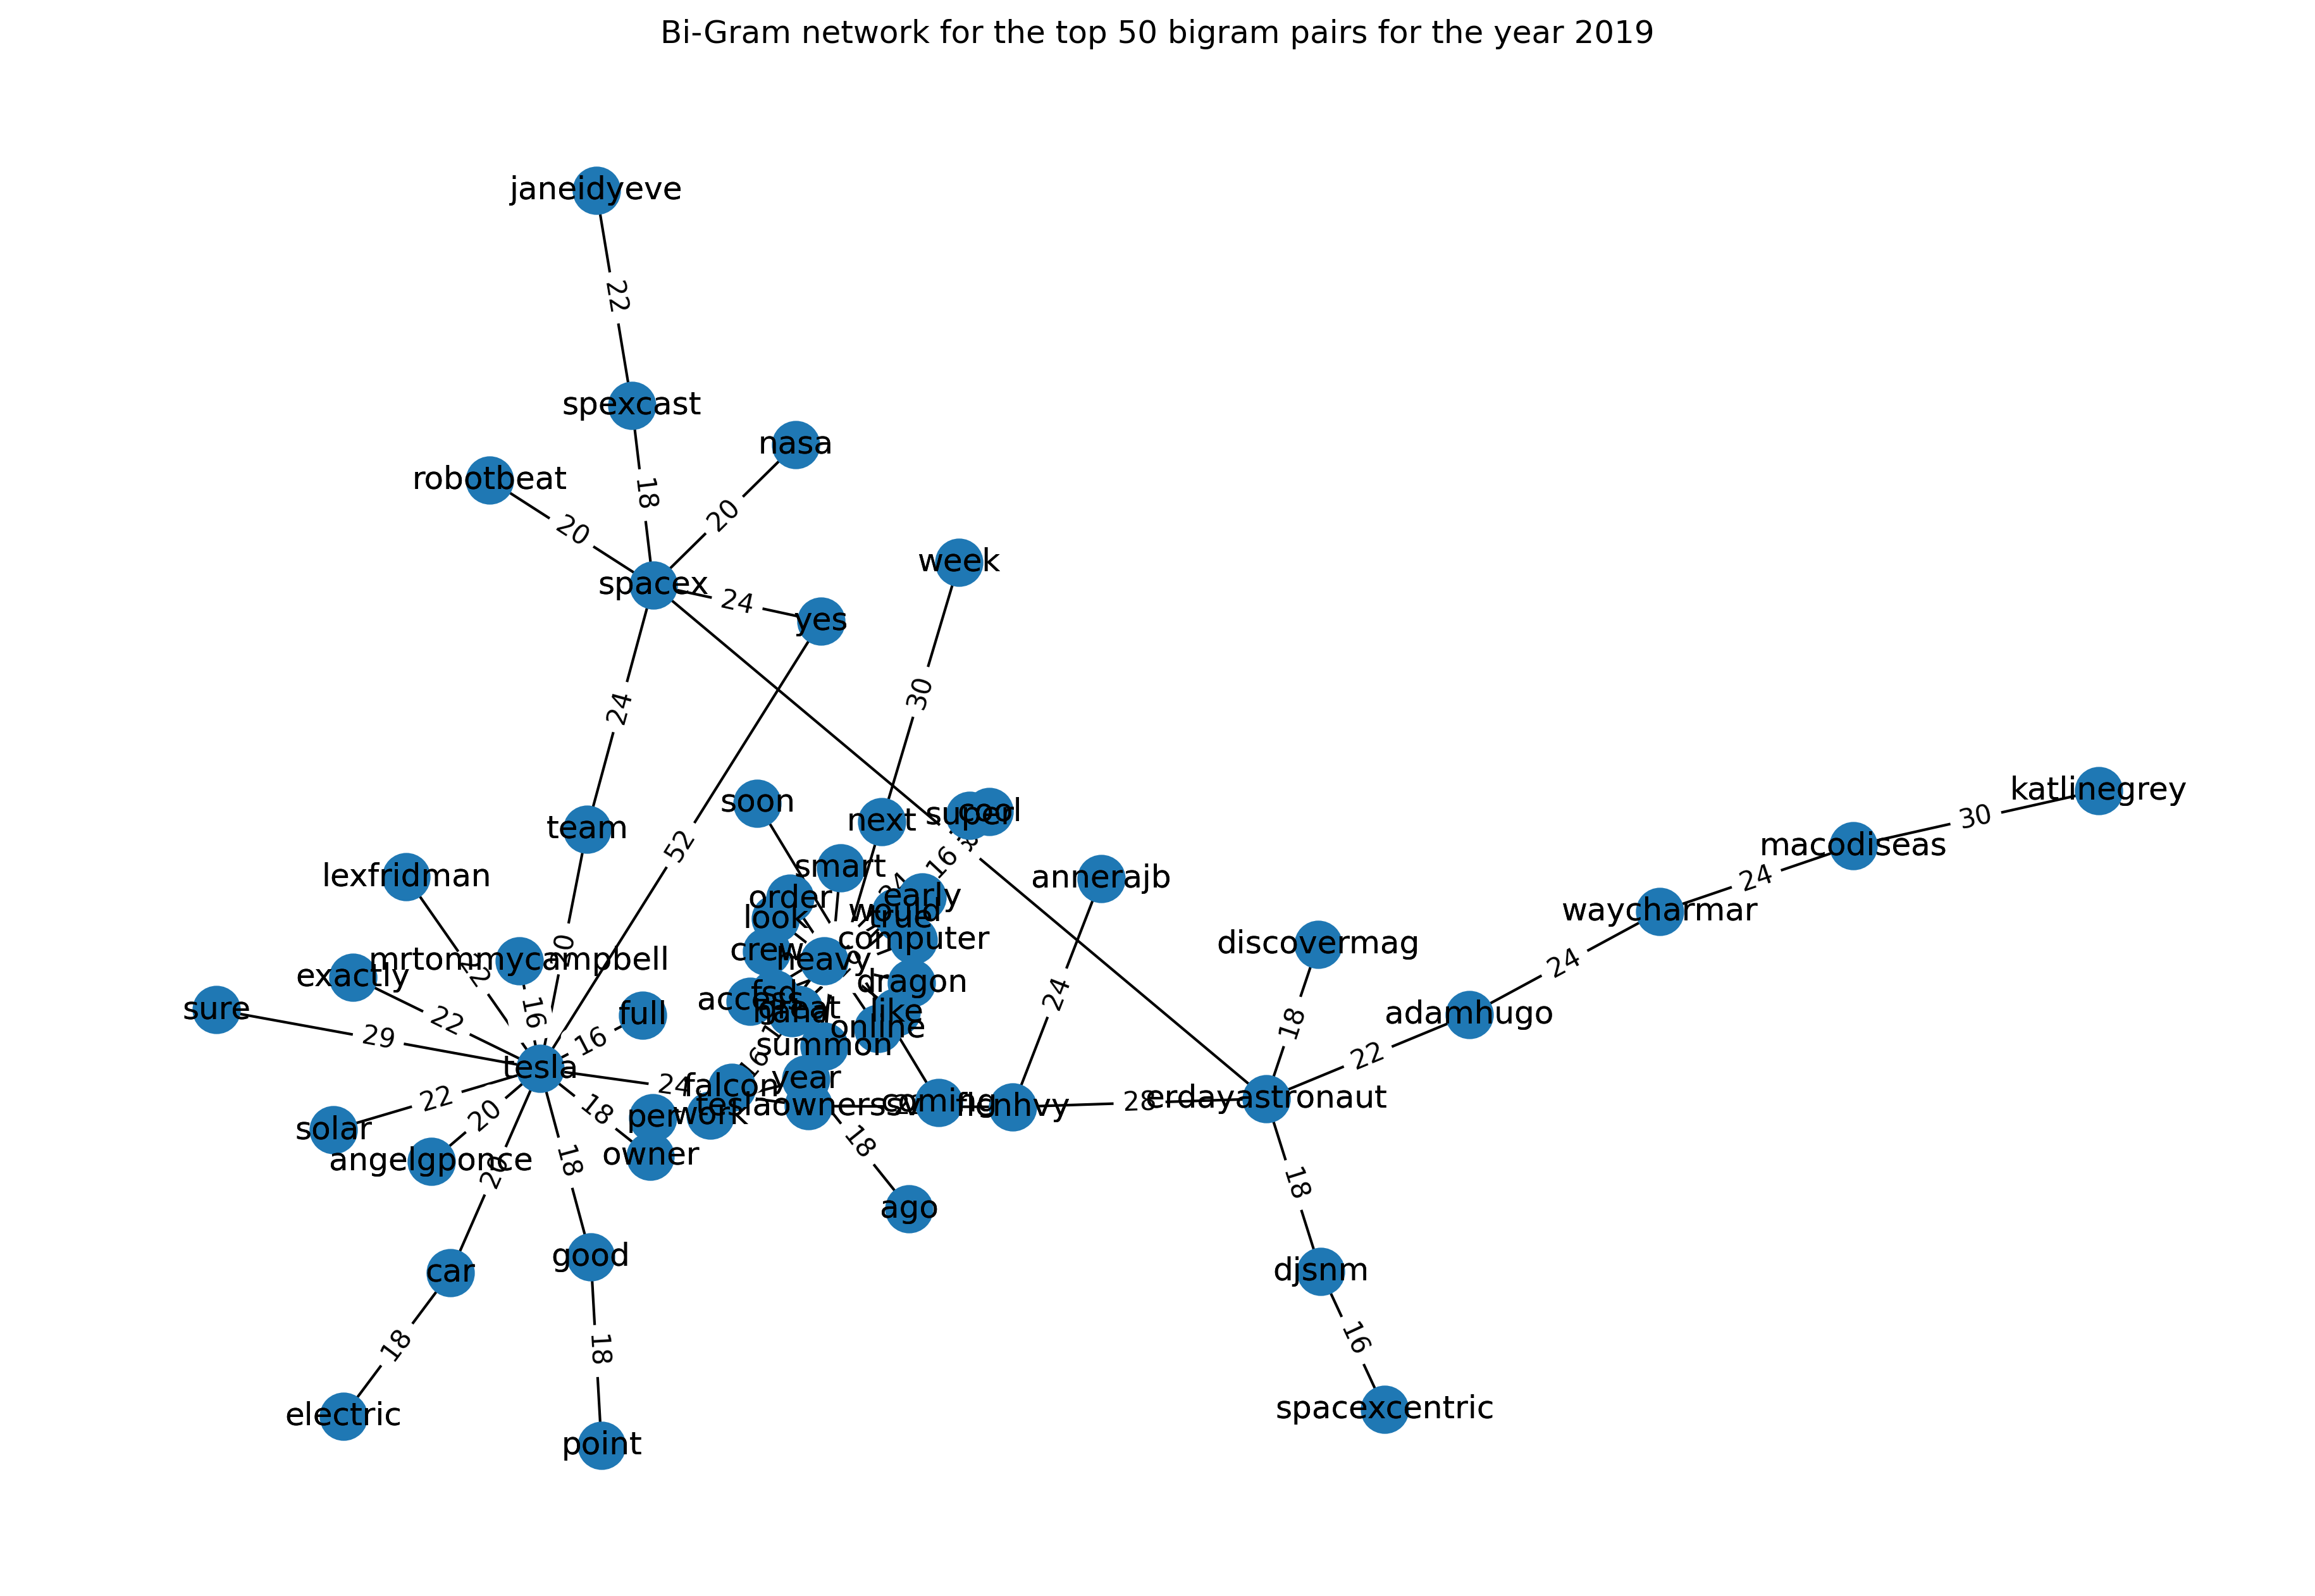

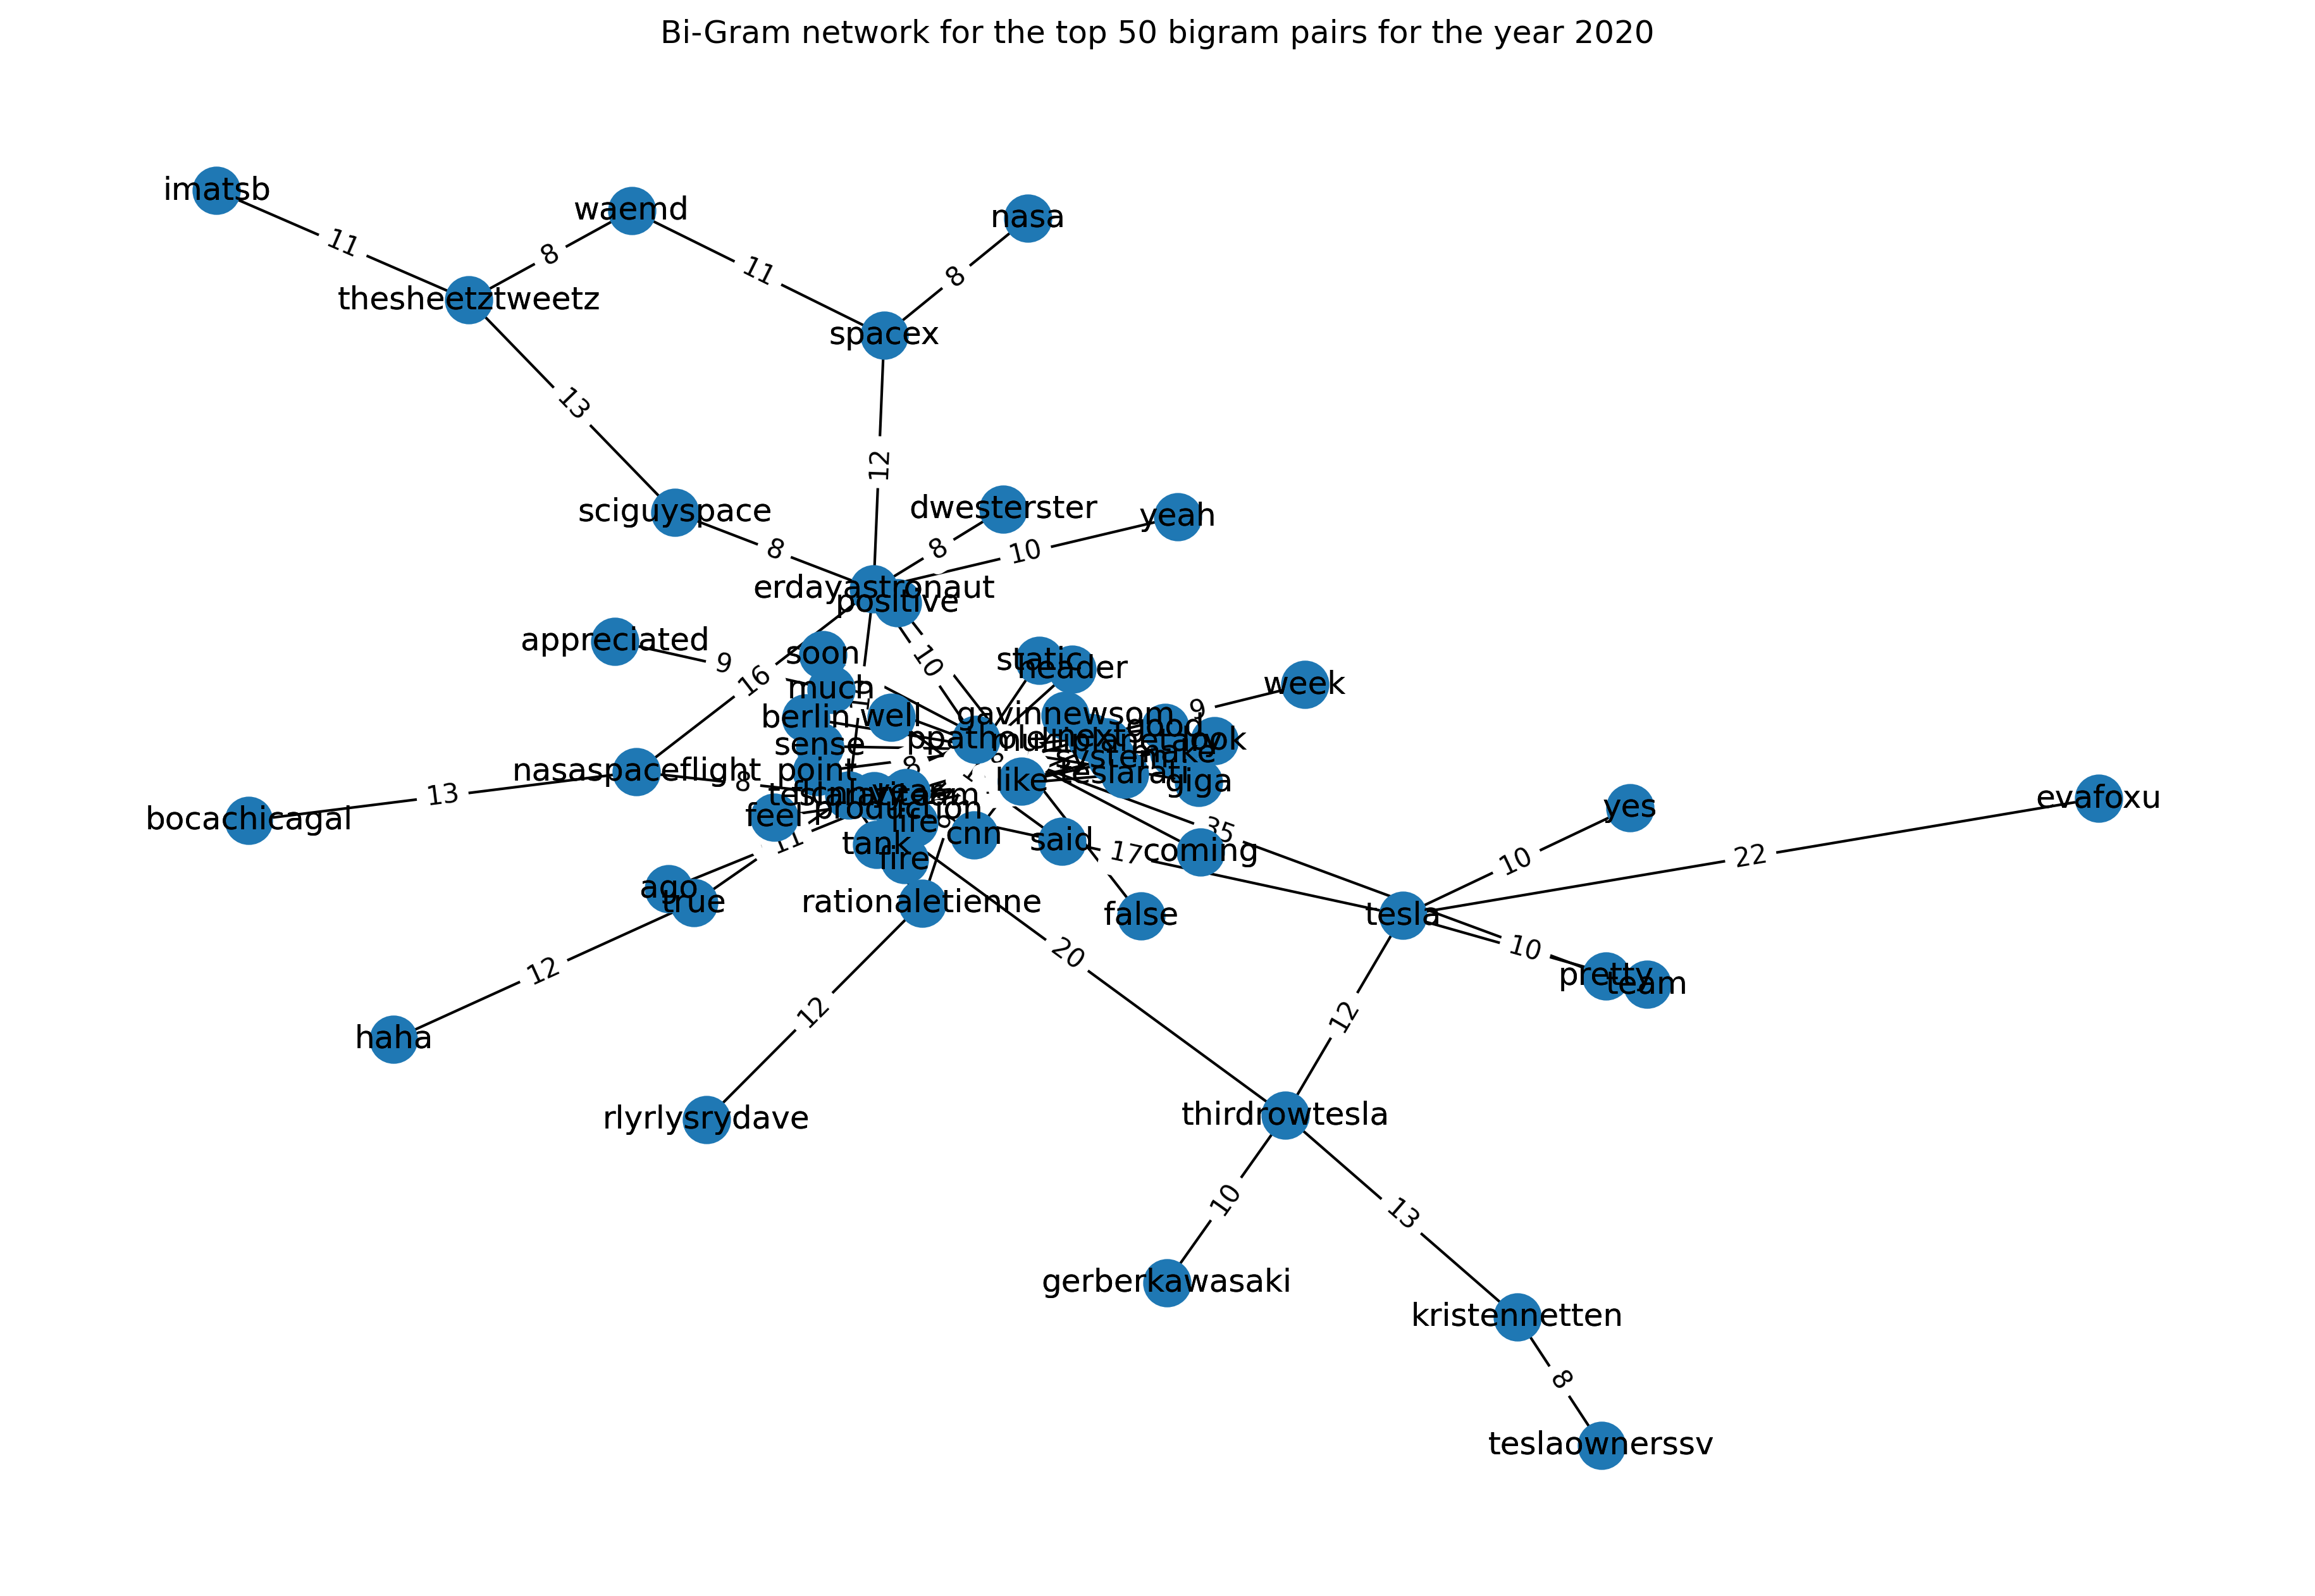

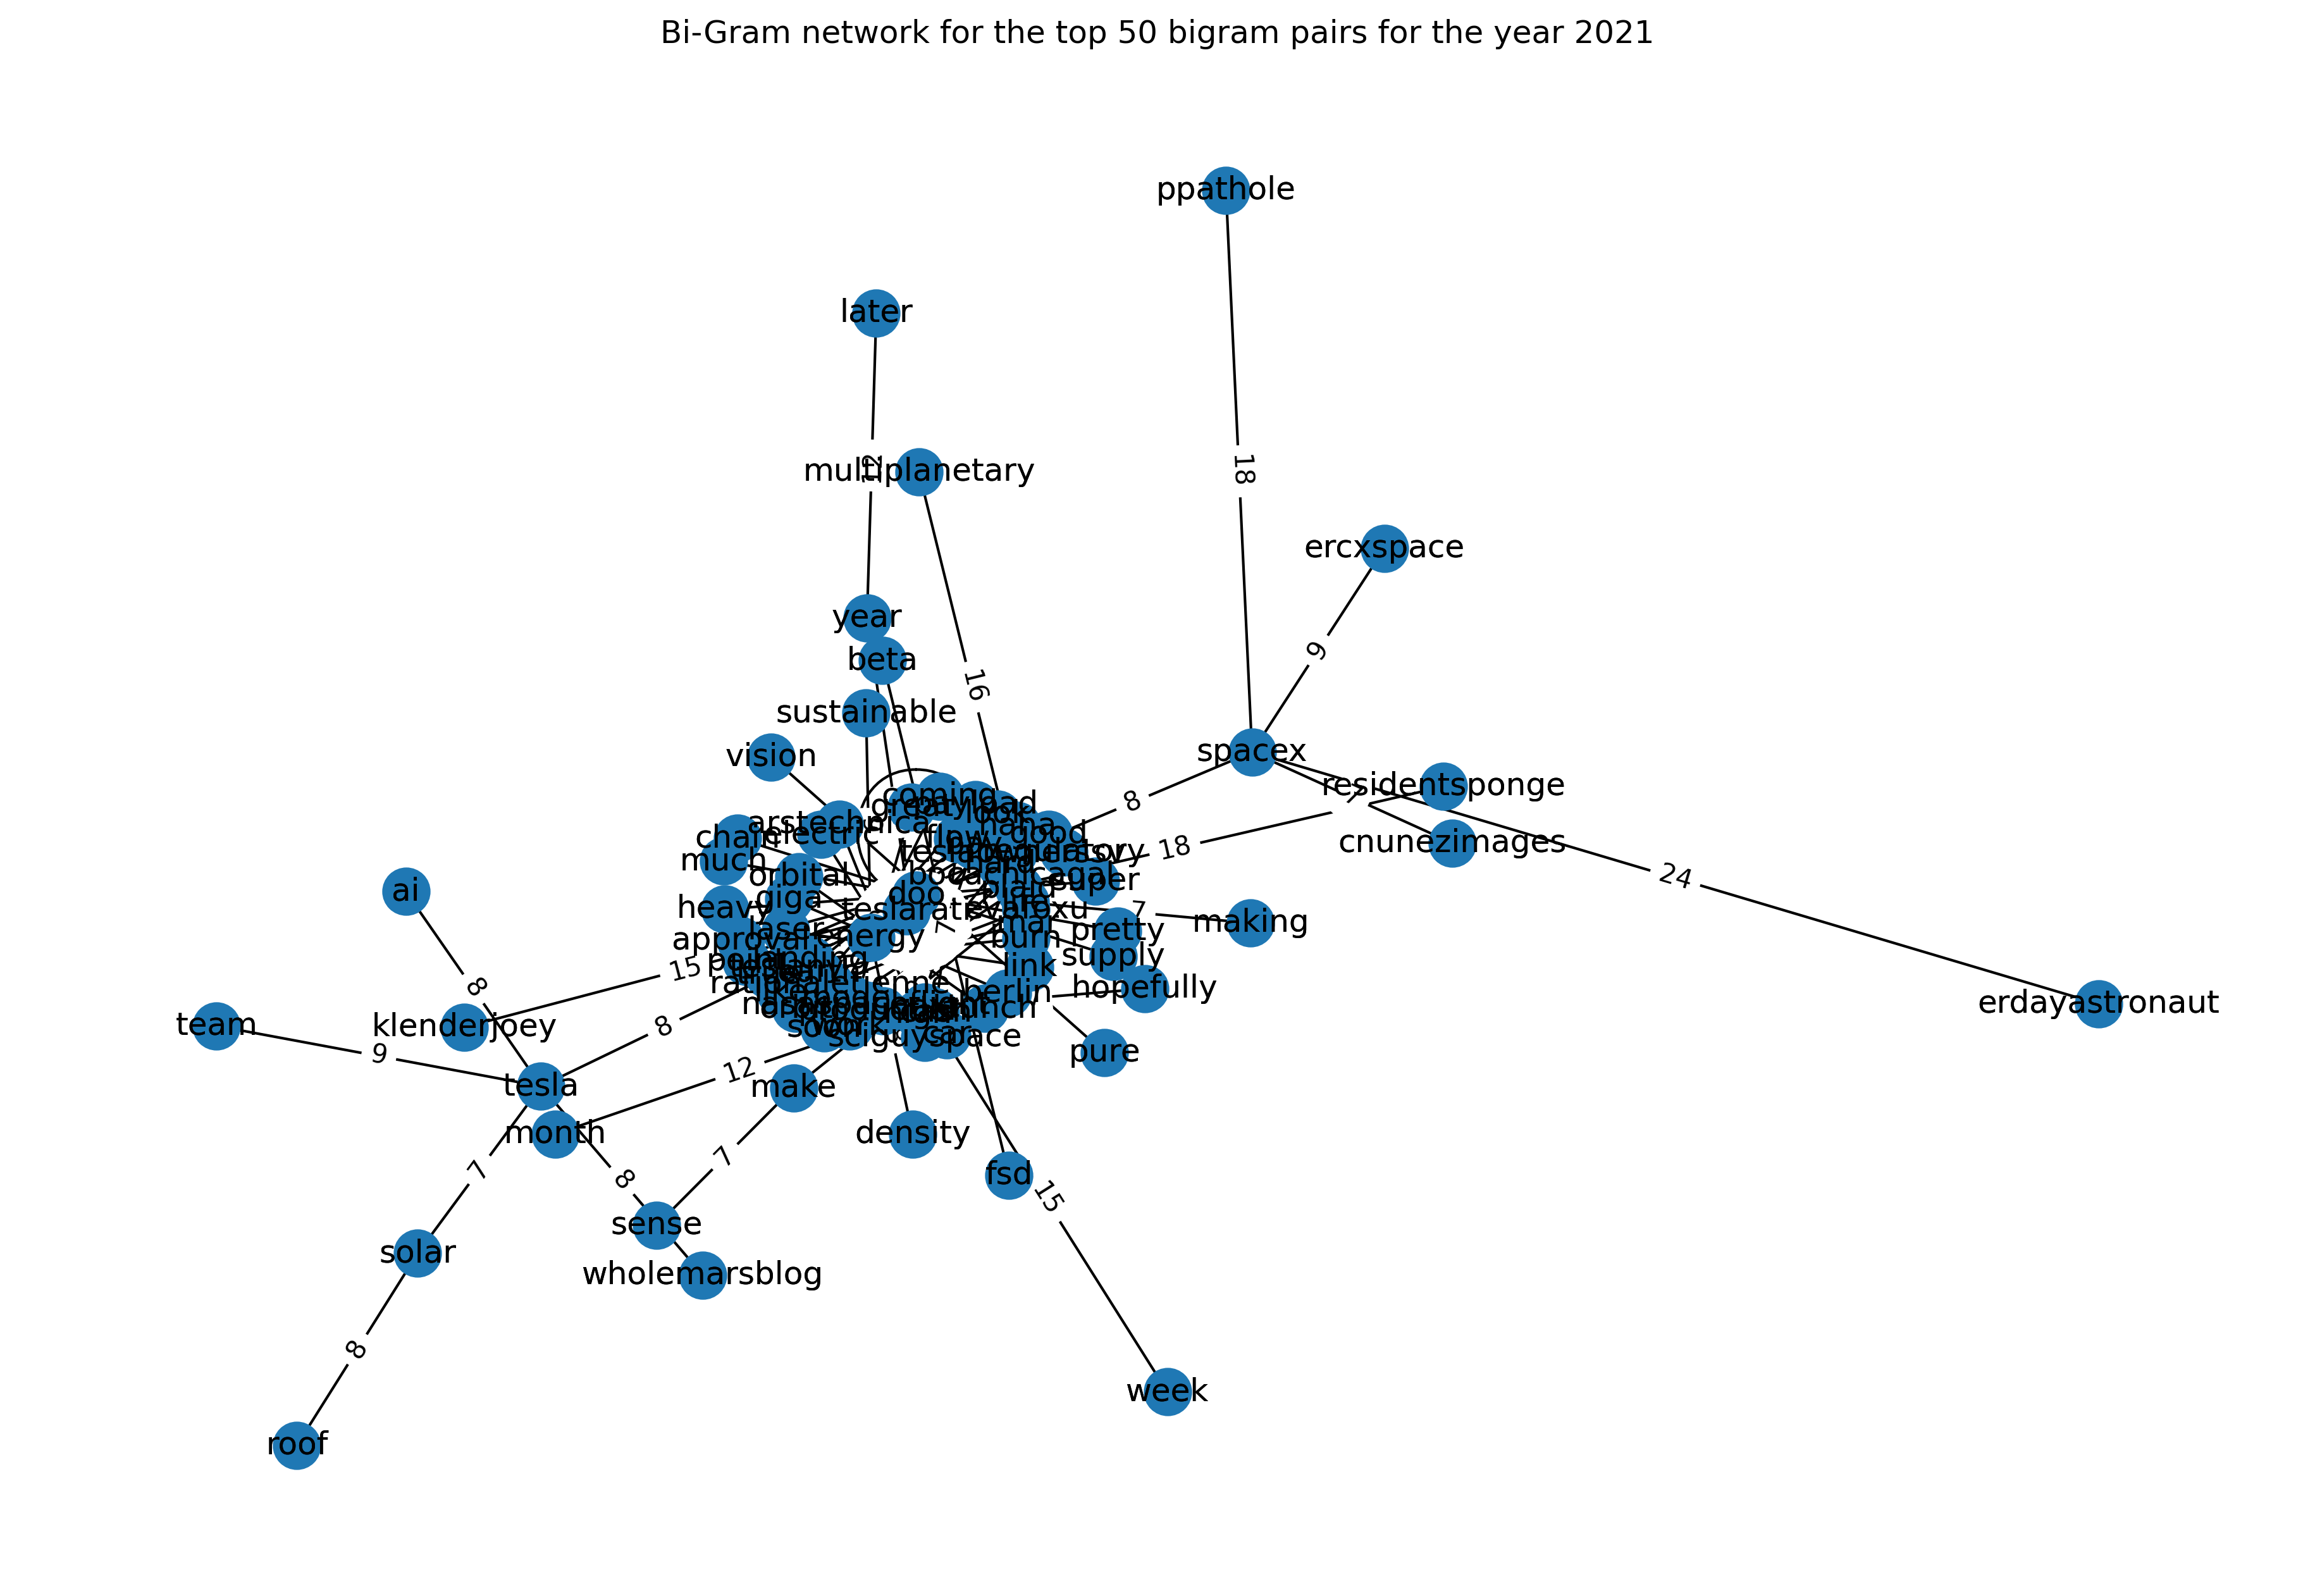

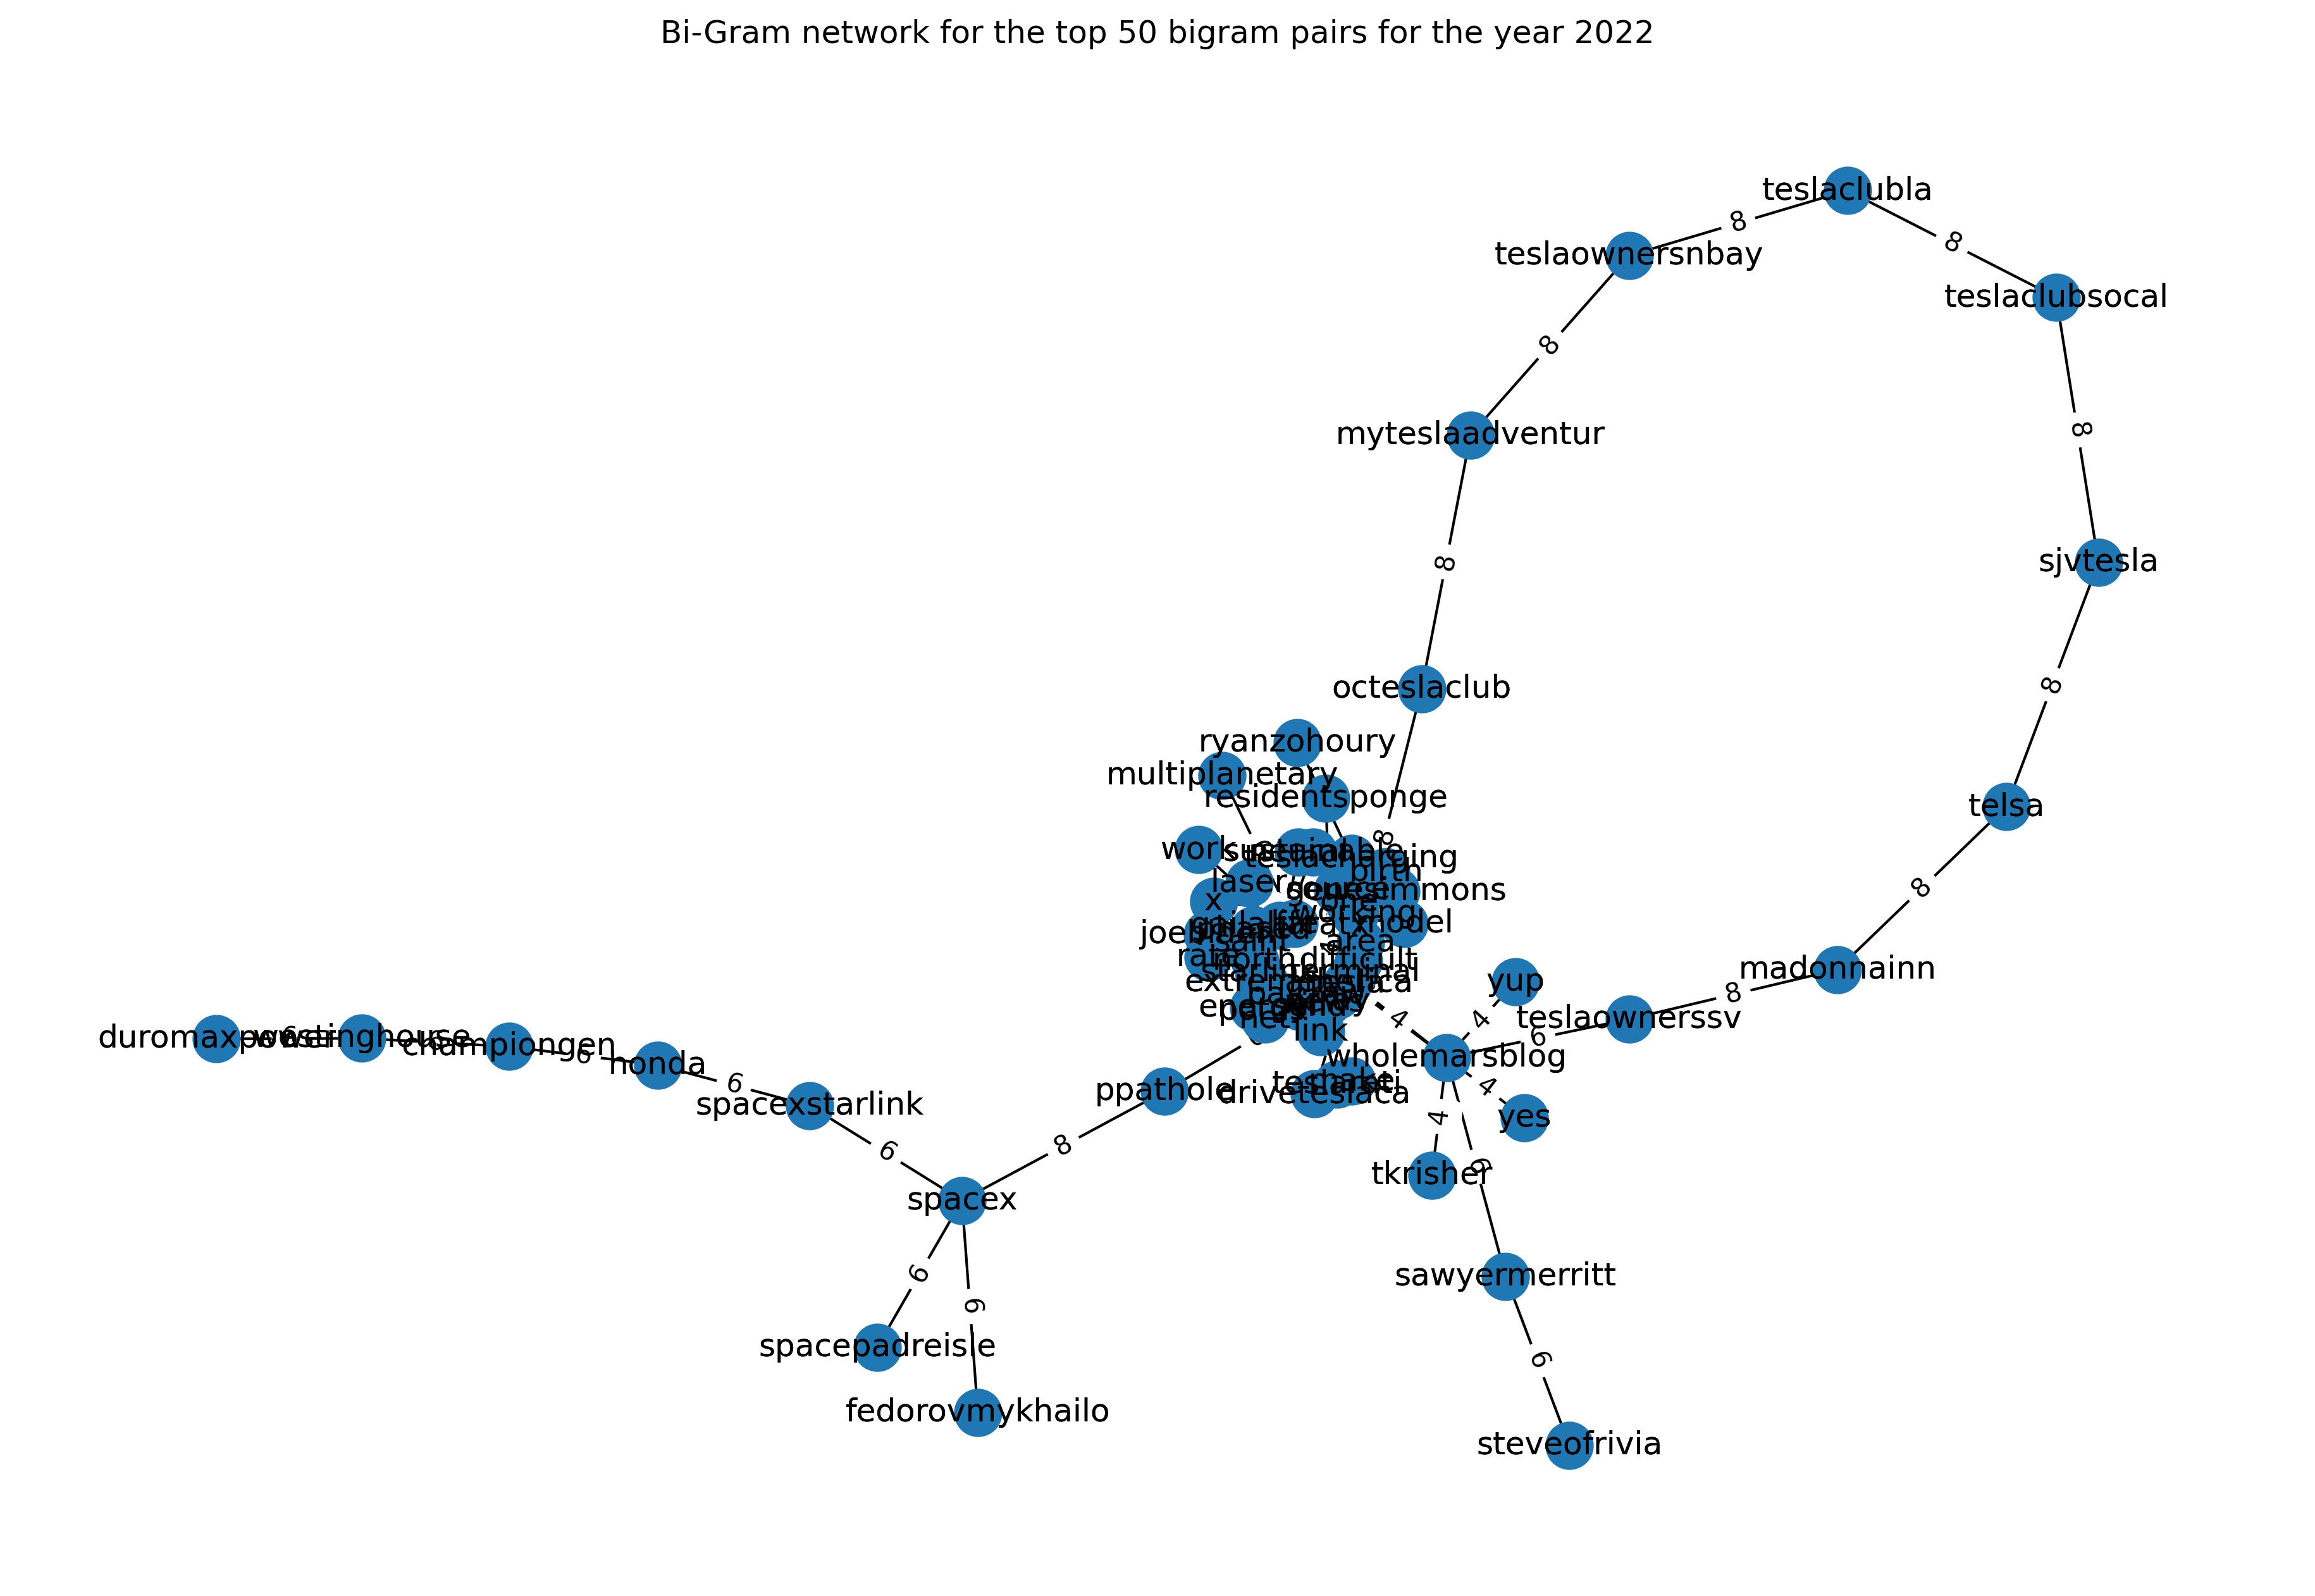

In [163]:
#looping through the cleaned bigram-df_temp dataframe year by year and finding the bigrams and their frequency; then selecting the top 50 bigrams by occurrences and plotting them using the networkx graph - kamada kawai layout
for i in sorted(list(bigram_df_temp.year.unique())):
    bigrams = []

    for tweet in bigram_df_temp[bigram_df_temp.year == i].loc[:, 'tweet_new']:
        tokenized_tweet = nltk.word_tokenize(tweet)
        bigrams.extend(list(nltk.bigrams(tokenized_tweet)))

    word_1 = [i[0] for i in bigrams]
    word_2 = [i[1] for i in bigrams]

    bigram_df = pd.DataFrame(columns = ['word_1', 'word_2'])
    bigram_df['word_1'] = word_1
    bigram_df['word_2'] = word_2

    bigram_df = bigram_df.groupby(['word_1', 'word_2']).size().reset_index(name = 'count')
    bigram_df = bigram_df.sort_values(by = 'count', ascending = False).reset_index(drop = True)

    plt.figure(figsize=(12,8), dpi = 300)
    G = nx.Graph()

    G.add_weighted_edges_from(zip(bigram_df.loc[:50, 'word_1'], bigram_df.loc[:50, 'word_2'], bigram_df.loc[:50, 'count']))

    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels = True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_edges(G, pos, width = 0.6, edge_color = 'black')
    nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black')
    plt.title(f'Bi-Gram network for the top 50 bigram pairs for the year {i}')
    plt.show()